# ADM Homework - 3
#### Goal of the homework: Build a search engine over the "best books ever" list of GoodReads. 

### 1. Data collection
*For this homework, there is no provided dataset, but you have to build our own. Our search engine will run on text documents.*

In [1]:
from platform import python_version
print("Python Version: ",python_version())

Python Version:  3.8.5


#### 1.1 Get the list of books
*We start from the list of books to include in your corpus of documents. In particular, we focus on the best books ever list. From this list we want to collect the url associated to each book in the list. As you realize, the list is long and splitted in many pages. We ask you to retrieve only the urls of the books listed in the **First 300 pages**.*

*The output of this step is a **.txt** file whose single line corresponds to a **Book's URL**.*

In [8]:
# Import Libraries
from bs4 import BeautifulSoup as bsp
from selenium import webdriver #Programmatic way to use Browser
from selenium.webdriver.common.keys import Keys
from webdriver_manager.firefox import GeckoDriverManager
import time
import pickle
import os
import re
import csv
import pandas as pd
from IPython.display import clear_output
from functions import findUrls,visualize, findBookUrls,carwlBooks,remove_tags,Parse_Web_Pages,Parse_Data,executeQuery,read_data,find_set,clean_info
#driver = webdriver.Firefox(executable_path=GeckoDriverManager().install())

In [6]:
%load_ext autoreload
%autoreload 2

In [ ]:
nl.download('stopwords')
nl.download('wordnet')
#Below given "href" is the Start page for the the Target link the get books URL's from all pages.

#In the funciton "findBooksUrls" will dynamically change the page for Upcomming Pages 
href = "https://www.goodreads.com/list/show/1.Best_Books_Ever?page=1"

Urls_Dic = findBookUrls(href,driver,300)

# Given Below is the file path to save the final dictionary to the given PATH.
DictionaryPKL = open(r"C:\Users\Zain\Desktop\ROMA\Sapienza\ADM\HW3\300PagesDic.pkl","wb")
pickle.dump(Urls_Dic,DictionaryPKL)
DictionaryPKL.close()

In [2]:
with open(r'C:\Users\Zain\Desktop\ROMA\Sapienza\ADM\HW3\300PagesDic.pkl', 'rb') as handle:
    pagesDict = pickle.load(handle)

with open(r'C:\Users\Zain\Desktop\ROMA\Sapienza\ADM\HW3\300Pages_UrlsList.txt','w+') as File:
    FlatList = [ item for elem in list(pagesDict.values()) for item in elem]
    #File.write('\n'.join(FlatList))

In [3]:
# Now as we have got all the links to the indivisual books from all pages
# Given below is the example how the Data is stored in the dictionary
# Dictionary ==> pagesDict[key,values] where [key=page No, values=Books Urls] 
pagesDict['page1'][:10]

['/book/show/2767052-the-hunger-games',
 '/book/show/2.Harry_Potter_and_the_Order_of_the_Phoenix',
 '/book/show/2657.To_Kill_a_Mockingbird',
 '/book/show/1885.Pride_and_Prejudice',
 '/book/show/41865.Twilight',
 '/book/show/19063.The_Book_Thief',
 '/book/show/170448.Animal_Farm',
 '/book/show/11127.The_Chronicles_of_Narnia',
 '/book/show/30.J_R_R_Tolkien_4_Book_Boxed_Set',
 '/book/show/11870085-the-fault-in-our-stars']

<br><br>
#### 1.2. Crawl books
*Once you get all the urls in the first 300 pages of the list, you:*<br>
<br>
*Download the html corresponding to each of the collected urls.*<br>
**After you collect a single page, immediatly save its html in a file. In this way, if your program stops, for any reason, you will not loose the data collected up to the stopping point. More details in Important (2).**<br>
Organize the entire set of downloaded html pages into folders. Each folder will contain the htmls of the books in page 1, page 2, ... of the list of books.<br><br>
**Important!!<br><br>
Due to the large amount of pages you need to download, we give you the following tipds that help you to speed up some time-consuming operations.**<br>
<br>
**[Save time downloading files]** You are asked to crawl tons of pages, and this will take a lot of time. To speed up the operation, we suggest you to work in parallel with your group's colleagues. In particular, using the same code, each component of the group can be in charge of downloading a subset of pages (e.g., the first 100). PAY ATTENTION: Once obtained all the pages, merge your results in a unique dataset. In fact, the search engine must look up for results in the whole set of documents.
<br><br>
**[Save your data]** It is not nice to restart a crawling procedure, given its runtime. For this reason, it is extremely important that for every time you crawl a page, you must save it with the name article_i.html, where i corresponds to the number of articles you have already downloaded. In such way, if something goes bad, you can restart your crawling procedure from the i+1-th document.

In [3]:
#Enter Start and End Range of Pages
#This will take a range of pages and will download it in the local directory
Start = 1
End = 1

#Change the Path here
FilePath = r"Users\Zain\Desktop\ROMA\Sapienza\ADM\HW3"

#Crawlbooks funciton Crawl all links and downlaod the HTML paegs to local directory 
carwlBooks(FilePath,Start,End)

#Given below OUTPUT is just a sample for downloading 3 HTML files to the FilePath given above

page1==> [File:0 Downloaded]
page1==> [File:1 Downloaded]
page1==> [File:2 Downloaded]


<br><br>
#### 1.3 Parse downloaded pages
At this point, you should have all the html documents about the books of interest and you can start to extract the books informations. The list of information we desire for each book are the following:
<br><br>
- Title (to save as bookTitle)
- Series (to save as bookSeries)
- Author(s), the first box in the picture below (to save as bookAuthors)
- Ratings, average stars (to save as ratingValue)
- Number of givent ratings (to save as ratingCount)
- Number of reviews (to save as reviewCount)
- The entire plot (to save as Plot)
- Number of pages (to save as NumberofPages)
- Published (Publishing Date)
- Characters
- Setting
- Url

In [ ]:
Start = 0 #Start point of your pages
End = 0 #End point of your downloaded webpages
File_path = r"C:\Users\Zain\Desktop\ROMA\Sapienza\ADM\HW3"

#Parse_Data will retrieve all the Data from the downloaded pages and will save it as a TSV file
Parse_Data(File_path,Start,End)

In [4]:
import pandas as pd
dataset = pd.read_csv("Dataset.tsv",sep='\t')
dataset.head()

,Unnamed: 0,bookTitle,bookSeries,bookAuthors,ratingValue,ratingCount,reviewCount,Plot_Values,Plot,NumberofPages,Publishing_Date,Characters,Setting,Url
0,0,MARS,NaN,Jasmine Rose,4.38,69,13,"{5: '47', 4: '7', 3: '11', 2: '2', 1: '2'}",❝�� my heart has become a planetand you are th...,NaN,2014,NaN,NaN,https://www.goodreads.com/book/show/23279048-mars
1,1,Black Box,NaN,Cassia Leo,4.02,6244,903,"{5: '2297', 4: '2320', 3: '1181', 2: '345', 1:...",♥️ Three fateful encounters....♥️ Two heart-br...,400.0,February 28th 2014,"['Mikki Gladstone', 'William ""Crush"" Slayer']","['Boston, Massachusetts']",https://www.goodreads.com/book/show/29539518-b...
2,2,Ruin and Rising,The Shadow and Bone Trilogy #3,Leigh Bardugo,4.09,158624,19396,"{5: '62107', 4: '59607', 3: '27962', 2: '6810'...",▶ \nAlternative Cover Edition #1\nThe capital ...,422.0,June 17th 2014,"['Alina Starkov', 'Malyen Oretsev', 'Darkling'...",['Ravka '],https://www.goodreads.com/book/show/14061957-r...
3,3,Shadow and Bone,The Shadow and Bone Trilogy #1,Leigh Bardugo,3.99,313190,32760,"{5: '108466', 4: '121286', 3: '62748', 2: '146...",▶ \nAlternative Cover Edition #1\nSurrounded b...,358.0,June 5th 2012,"['Alina Starkov', 'Malyen Oretsev', 'Darkling'...",['Ravka '],https://www.goodreads.com/book/show/10194157-s...
4,4,An Ember in the Ashes,An Ember in the Ashes #1,Sabaa Tahir,4.27,184959,23147,"{5: '91602', 4: '63735', 3: '21164', 2: '5487'...",▶ \nAlternative Cover Edition #1\nLaia is a sl...,446.0,February 9th 2016,"['Laia', 'Elias Veturius', 'Helene Aquilla', '...",NaN,https://www.goodreads.com/book/show/27774758-a...


 ##### Filtering all the  english plots

Here we call the function `english_plots` to clean the dataset and drop all the books with corrupted pages. We then the whole dataset with the new one filtered.

In [ ]:
dataset_filterd=english_plots(dataset)
dataset_filtered.to_csv('Dataset_final_filtered.tsv',index=False)

In [9]:
#Function "read_data" will get Filtered Dataset, Dictionary of Vocabulary and Inderted Index Dictionary as ID 
dataset,vocabulary,ID,ID_tfidf = read_data()

Our final datset is about 26000 rows.

In [31]:
len(dataset)

26242

<br><br><br>
### Question 2
*Now, we want to create two different **Search Engines** that, given as input a query, return the books that match the query*.

First, you must pre-process all the information collected for each book by

* Removing stopwords
* Removing punctuation
* Stemming

Anything else you think it's needed
For this purpose, you can use the **nltk library**.

In [ ]:
from functions import clean_info

The function `clean_info` cleans the plots in the dataset.

In [ ]:
cleaned_plots=[]
plots=dataset['Plot']
n=len(plots)

for i in range(n):
    p=clean_info(plots[i])
    cleaned_plots.append(p)

We then save the results in a separated file, which we will later use to create the vocabulary.

In [ ]:
with open('clean_plots.pkl', 'wb') as f:
    pickle.dump(cleaned_plots, f, pickle.HIGHEST_PROTOCOL)
    f.close()


#### 2.1 Conjunctive query
*For the first version of the search engine, we narrow our interest on the Plot of each document. It means that you will evaluate queries only with respect to the book's plot.*<br>

##### <br>2.1.1 Create your index!
*Before building the index,<br>*
<br>
Create a file named **vocabulary**, in the format you prefer, that maps each word to an integer (term_id).<br>
Then, the first brick of your homework is to create the **Inverted Index**. It will be a dictionary of this format:<br>
<br>
{<br>
term_id_1:[document_1, document_2, document_4],<br>
term_id_2:[document_1, document_3, document_5, document_6],<br>
...}<br>
where **document_i** is the id of a document that contains the word.<br>
<br>
Hint: Since you do not want to compute the inverted index every time you use the **Search Engine**, it is worth to think to store it in a separate file and load it in memory when needed.<br>

#### Creating the vocabulary

We map to numbers all of the words in `clean_plots.pkl` and save the results in a file called `vocabulary` to be able to import it each time we need it.

In [ ]:
#the map function is simple, each word is associated to a number from 1 to n (number of words we have)

vocabulary={}
index=1

for p in cleaned_plots:
    plot=p.split(' ')
    for word in plot:
        if word not in vocabulary:
            vocabulary[word]=index
            index+=1

We save the vocabulary in a pickle file. 

In [ ]:
with open('vocabulary.pkl', 'wb') as f:
    pickle.dump(vocabulary, f, pickle.HIGHEST_PROTOCOL)
    f.close()

The vocabulary contains about $94000 $ words, each of which is mapped to a number.\
Here are some examples:

In [66]:
vocabulary['heart']

1

In [68]:
vocabulary['hicks-wilsonthere']

9

In [69]:
vocabulary['heart-breaking']

60

#### Creating the Inverted Index

We create the inverted index from the vocabulary and the cleaned plots.

In [ ]:
documents_ID=df['document_ID']
# create an inverted index without tfidf
'''
ID={word_id:[doc_1,doc_2,.....]}
'''
n=len(cleaned_plots)
ID=defaultdict(list)

for i in range(n):
    p=cleaned_plots[i].split(' ') 
    p=set(p)
    for word in p:
        ID[vocabulary[word]].append(documents_ID[i])    

We save the inverted index in a pickle file.

In [ ]:
with open('ID.pkl', 'wb') as f:
    pickle.dump(ID, f, pickle.HIGHEST_PROTOCOL)
    f.close()

An example:

In [11]:
ID[60][:20]

[1,
 890,
 1332,
 2101,
 3597,
 4518,
 9721,
 12003,
 12573,
 12935,
 13261,
 14043,
 15814,
 17313,
 18441,
 18545,
 19521,
 20327,
 20447,
 23316]

These are the first $20$ documents which contains the word *heart-breaking*.

##### <br><br> 2.1.2 Execute the query
Given a query, that you let the user enter:<br>
<br>
**survival games<br>**<br>
the Search Engine is supposed to return a list of documents.<br>
<br>
What documents do we want?<br>
Since we are dealing with conjunctive queries (AND), each of the returned documents should contain all the words in the query. The final output of the query must return, if present, the following information for each of the selected documents:<br>
<br>
* bookTitle
* Plot
* Url

In [89]:
from functions import find_query

# to print the plots with the newlines
pd.set_option('display.max_colwidth', None)

Some examples:

In [90]:
#Example 1 

query1 = find_query(ID, vocabulary)
dataset.iloc[query1][['bookTitle', 'Plot', 'Url']].reset_index(drop=True).head()

Search : survival games


,bookTitle,Plot,Url
0,Altar of Bones,"“They didn’t have to kill him…He never drank from the altar of bones.” Cryptic dying words from a murdered homeless woman in present day San Francisco unlock a decades-buried secret that changed history. Now a pair of ruthless assassins are sent to cut the few living ""loose ends."" And a young, resourceful woman on the run encounters a determined man with his own connected past and vengeful agenda. Forced to partner for survival and answers, a fast-paced and deadly game of cat and mouse ensues, taking them across the globe from the winding streets of Paris to the faded palaces of Budapest to the frozen lakes of Mongolia...where destiny, passion, and further betrayal await them. The Altar of Bones has it all: The Russian mob. KGB spies. Presidential assasination. A doomed Hollywood legend. Deathbed confessions. Corrosive power. Shattered families. Guardians of an ancient religious icon housing a secret others will kill to possess. The dark promise of immortality. And it delivers on its ambitious premise to leave you stunned and breathless at the end.",https://www.goodreads.com/book/show/9376703-altar-of-bones
1,Akarnae,"With just one step, sixteen-year-old Alexandra Jennings's world changes—literally.Dreading her first day at a new school, Alex is stunned when she walks through a doorway and finds herself stranded in Medora, a fantasy world full of impossibilities. Desperate to return home, she learns that only a man named Professor Marselle can help her... but he's missing.While waiting for him to reappear, Alex attends Akarnae Academy, Medora's boarding school for teenagers with extraordinary gifts. She soon starts to enjoy her bizarre new world and the friends who embrace her as one of their own, but strange things are happening at Akarnae, and Alex can't ignore her fear that something unexpected... something sinister... is looming.An unwilling pawn in a deadly game, Alex's shoulders bear the crushing weight of an entire race's survival. Only she can save the Medorans, but what if doing so prevents her from ever returning home?Will Alex risk her entire world—and maybe even her life—to save Medora?",https://www.goodreads.com/book/show/23569787-akarnae
2,Mud Vein,"When reclusive novelist Senna Richards wakes up on her thirty-third birthday, everything has changed. Caged behind an electrical fence, locked in a house in the middle of the snow, Senna is left to decode the clues to find out why she was taken. If she wants her freedom, she has to take a close look at her past. But, her past has a heartbeat... and her kidnapper is nowhere to be found. With her survival hanging by a thread, Senna soon realizes this is a game. A dangerous one. Only the truth can set her free.",https://www.goodreads.com/book/show/18246727-mud-vein
3,The Elephant Whisperer,"When South African conservationist Lawrence Anthony was asked to accept a herd of 'rogue' elephants on his Thula Thula game reserve in South Africa, his commonsense told him to refuse. But he was the herd's last chance of survival - notorious escape artists, they would all be killed if Lawrence wouldn't take them. He agreed, but before arrangements for the move could be completed the animals broke out again and the matriarch and her baby were shot. The remaining elephants were traumatised, dangerous, and very angry. As soon as they arrived at Thula Thula they started planning their escape...As Lawrence battled to create a bond with the elephants and save them from execution, he came to realise that they had a lot to teach him about life, loyalty and freedom. Set against the background of life on the reserve, with unforgettable characters and exotic wildlife, this is a delightful book that will appeal to animal lovers everywhere.",https://www.goodreads.com/book/show/6375561-the-elephant-whisperer
4,Dom Wars: Round Six,"When Gladiator Inc, an adult toy company expands their market to familiarize the ‘vanilla’ world with the elements of BDSM, the r

In this example we enter a word which does not exist in the vocabulary and then we enter the correct word.

In [93]:
#Example 2
query2 = find_query(ID, vocabulary)
dataset.iloc[query2][['bookTitle', 'Plot', 'Url']].reset_index(drop=True).head()

Search : magikk
The word you were looking for was not found,please enter a new one
Search : magic


,bookTitle,Plot,Url
0,Siege and Storm,"▶ \nAlternative Cover Edition #1\nDarkness never dies.Hunted across the True Sea, haunted by the lives she took on the Fold, Alina must try to make a life with Mal in an unfamiliar land, all while keeping her identity as the Sun Summoner a secret. But she can’t outrun her past or her destiny for long.The Darkling has emerged from the Shadow Fold with a terrifying new power and a dangerous plan that will test the very boundaries of the natural world. With the help of a notorious privateer, Alina returns to the country she abandoned, determined to fight the forces gathering against Ravka. But as her power grows, Alina slips deeper into the Darkling’s game of forbidden magic, and farther away from Mal. Somehow, she will have to choose between her country, her power, and the love she always thought would guide her—or risk losing everything to the oncoming storm.",https://www.goodreads.com/book/show/14061955-siege-and-storm
1,The Unsuspecting Mage,"“Want to be a mage? Then do we have the job for you…”Sounds great for a veteran role-player. When on-the-job training entails battling demons, learning magic through trial and error, and living in a world without toilet paper, things could get rough. But to be dropped in the middle of a forest and having to do it on your own with no instruction…welcome to James’ world.It all gets started when his grandfather suggests to James, a young man on the verge of graduating high school, that he check out the following advertisement for a job. “Magic! Real Magic! Ever wanted to learn? We require someone with intelligence and a disciplined mind. Those well versed in fantasy novels and role playing games a plus. May need to travel.”Sounded like the perfect job for a veteran role-player and avid fantasy reader. James had no idea he’d be whisked to another world, completely cut off from friends and family. Arriving in a meadow in the middle of a forest, he’s greeted by a creature not entirely human. He was then told three things:Magic works here…Don’t try to go home…Get to the village of Trendle…Then the creature vanished.Which way was Trendle? Where was he? What might inhabit the forest that will seek his ruination? These were but a few of the questions needing to be unraveled. Alone with only his wits and knowledge gleaned from hundreds of books and dungeon campaigns, he started out just trying to survive. He soon learned that one mistake, one lapse in judgment could mean his death. Not long after arriving, he made the acquaintance of Miko, a street-wise kid who quickly became his friend and companion. Little did he know that the strength within this child from the streets of Bearn, a strength that would be tested again and again as they waded through battle after battle, delved in hidden passages deep beneath the earth, and faced off against an the might of an Empire, would be invaluable in the trials ahead.The Unsuspecting Mage is the first book of The Morcyth Saga, a seven book epic fantasy adventure. It follows James as he seeks first to master the art of magic then to uncover the reason why he had been brought to this strange new world where armies are on the move and gods meddle in the affairs of men.",https://www.goodreads.com/book/show/5980364-the-unsuspecting-mage
2,Voices of the Stars,"“Voices of the Stars” is a sweeping, heroic saga - presented in an Arthurian setting in a very historically accurate Post-Roman land of the Britons. It is a metaphysical, psychological, action/adventure, myth and magic, tragic romance, medieval warfare, fantasy, historical fiction novel.“Voices of the Stars” is the true, in-depth, eye-witness chronicle of the world of the King, Arthur, and his compatriots of his Alliance of the 5 distinct cultures living on “These Our Fair Isles”: the original Old Dark Tribes, the Celtic Clans, the Roman-styled Britons, the Picti and the original, ‘legal’ Saxons, whose land was obtained through barter with Vortigern. It is also the real

In this example we enter a combination of words which isn't in any plot: we will get an empty table as a result.

In [94]:
#Example 3
query3 = find_query(ID, vocabulary)
dataset.iloc[query3][['bookTitle', 'Plot', 'Url']].reset_index(drop=True).head()

Search : magic fire assassin women


,bookTitle,Plot,Url


<br><br>
#### 2.2 Conjunctive query & Ranking score
*For the second search engine, given a query, we want to get the top-k (the choice of k it's up to you!) documents related to the query. In particular:*

<br>Find all the documents that contains all the words in the query.
Sort them by their similarity with the query
<br>Return in output k documents, or all the documents with non-zero similarity with the query when the results are less than k. You must use a heap data structure (you can use **Python libraries**) for maintaining the **top-k documents**.<br>
*To solve this task, you will have to use the tfIdf score, and the Cosine similarity. The fielf to consider it is still the plot. Let's see how.*

<br><br>
##### 2.2.1 Inverted index
**Your second Inverted Index must be of this format:**

{<br>
**term_id_1**:[(document1, tfIdf_{term,document1}), (document2, tfIdf_{term,document2}), (document4, tfIdf_{term,document4}), ...]<br>
...}<br><br>
Practically, for each word you want the list of documents in which it is contained in, and the relative **tfIdf score**.

**Tip**: tfIdf values are invariant with respect to the query, for this reason you can precalculate them.

#### Inverted Index with tfidf

In [ ]:
#create an ID with tfidf
'''
ID_tfifd={word_id:[(doc1_ID,tfidf1),(doc2_ID,tfidf2......)]}
'''

def calculate_tfidf(doc_id,w,N):
    #find the plot
    plot_base=cleaned_plots[doc_id]
    
    #count the time of a word appears in the plot
    time_frequency=plot_base.count(w)
    
    #calculate the tfidf
    inv_doc_freq=np.log10(n/N)
    
    return round(time_frequency*inv_doc_freq,4)

#global value for tfidf
#total number of documents
n=len(df['document_ID']) 

ID_tfidf=defaultdict(list)

for word in vocabulary:
    word_mapped=vocabulary[word]
    n_ID=len(ID[word_mapped])   #local value necessary for tfidf
    for document_ID in ID[word_mapped]:
        ID_tfidf[word_mapped].append((document_ID,calculate_tfidf(document_ID,word,n_ID)))
        

In [ ]:
with open('ID_with_tfidf.pkl', 'wb') as f:
    pickle.dump(ID_tfidf, f, pickle.HIGHEST_PROTOCOL)
    f.close()

##### 2.2.2 Execute the query
In this new setting, given a query you get the right set of documents (i.e., those containing all the words in the query) and sort them according to their similairty to the query. For this purpose, as scoring function we will use the Cosine Similarity with respect to the tfIdf representations of the documents. <br>
<br>
Given a query, that you let the user enter:
<br>
**survival games**<br>
the search engine is supposed to return a list of documents, ranked by their Cosine Similarity with respect to the query entered in input.
<br><br><br>
More precisely, the output must contain:

* bookTitle
* Plot
* Url
* The similarity score of the documents with respect to the query

In [117]:
query = input("Please enter the Query: ")
query = clean_info(query)
query = query.split(' ')

#Sample Query: * Survival games
print("Query cleaned: ",query)

Please enter the Query: Survival games
Query cleaned:  ['survival', 'game']


In [130]:
founddata = executeQuery(query,vocabulary,ID_tfidf,dataset)
founddata

,bookTitle,Plot,Url,new_similarity_score
17683,Warcross,"For the millions who log in every day, Warcross isn’t just a game—it’s a way of life. The obsession started ten years ago and its fan base now spans the globe, some eager to escape from reality and others hoping to make a profit. Struggling to make ends meet, teenage hacker Emika Chen works as a bounty hunter, tracking down players who bet on the game illegally. But the bounty hunting world is a competitive one, and survival has not been easy. Needing to make some quick cash, Emika takes a risk and hacks into the opening game of the international Warcross Championships—only to accidentally glitch herself into the action and become an overnight sensation.Convinced she’s going to be arrested, Emika is shocked when instead she gets a call from the game’s creator, the elusive young billionaire Hideo Tanaka, with an irresistible offer. He needs a spy on the inside of this year’s tournament in order to uncover a security problem . . . and he wants Emika for the job. With no time to lose, Emika’s whisked off to Tokyo and thrust into a world of fame and fortune that she’s only dreamed of. But soon her investigation uncovers a sinister plot, with major consequences for the entire Warcross empire.",https://www.goodreads.com/book/show/41014903-warcross,0.126649
24202,Blood Awakening,"A dangerous game of life, blood, and survival… Marquis Silivasi is a loner, an ancient vampire known to be merciless, harsh, and unforgiving. He has lived to see his dark twin sacrificed, his parents hunted, and the one soul he was sworn to protect destroyed by his enemy. When a mysterious female with a secret past shows up in Dark Moon Vale, her presence sets off a strange set of events: It is as if she has awakened the sleeping soul of the valley…and the Curse of Marquis’s birth.Bound to each other by primeval law, the two must forge their way through an ever growing maze of danger, deception, and destiny. They must find salvation in a world without mercy, where survival demands a chilling BLOOD AWAKENING.",https://www.goodreads.com/book/show/11030236-blood-awakening,0.067923
10305,Code Name Verity,"Oct. 11th, 1943 - A British spy plane crashes in Nazi-occupied France. Its pilot and passenger are best friends. One of the girls has a chance at survival. The other has lost the game before it's barely begun. When ""Verity"" is arrested by the Gestapo, she's sure she doesn't stand a chance. As a secret agent captured in enemy territory, she's living a spy's worst nightmare. Her Nazi interrogators give her a simple choice: reveal her mission or face a grisly execution. As she intricately weaves her confession, Verity uncovers her past, how she became friends with the pilot Maddie, and why she left Maddie in the wrecked fuselage of their plane. On each new scrap of paper, Verity battles for her life, confronting her views on courage and failure and her desperate hope to make it home. But will trading her secrets be enough to save her from the enemy? Harrowing and beautifully written, Elizabeth Wein creates a visceral read of danger, resolve, and survival that shows just how far true friends will go to save each other. Code Name Verity is an outstanding novel that will stick with you long after the last page.",https://www.goodreads.com/book/show/11925514-code-name-verity,0.067923
6116,U-10,"The U-10 is a survival kit you might not survive using. Activated by unreadable cards, it could create a can of soup - - or an explosive grenade that looks like a can of soup. The U-10 is a guessing game of life or death.A top-secret paramilitary agency wants the U-10 and its gadgets, the guy who has the U-10 wants to keep it, and the alien who lost the U-10 wants it back. A death squad is dispatched to retrieve the U-10 and will stop at nothing, including the destruction of Earth, to accomplish their mission. Using the U-10 to heal battle wounds produces unexpected results.What good is a U-10 survival kit that has just 

### <br><br> Question 3 
##### Define a new score!<br>
Now it's your turn. Build a new metric to rank books based on the **queries** of their users.<br>
<br>
In this scenario, a single user can give in input more information than the single textual query, so you need to take into account all this information, and **think a creative and logical** way on how to answer at user's requests.<br>
<br>
Practically:<br>
<br>
The user will enter you a text query. As a starting point, get the **query-related** documents by exploiting the search engine of Step 2.1.<br>
<br>
Once you have the documents, you need to sort them according to your new score. In this step you won't have anymore to take into account just the plot of the documents, you must use the remaining variables in your dataset (or new possible variables that you can create from the existing ones...). You must use a heap data structure ***(you can use Python libraries)*** for maintaining the top-k documents.<br>
<br>
**Q**: *How to sort them? A: Allow the user to specify more information, that you find in the documents, and define a new metric that ranks the results based on the new request.*<br>
<br>
**N.B**: You have to define a ***scoring function***, not a filter!<br>
<br>
The output, must contain:<br>
<br>
* bookTitle
* Plot
* Url
* The similarity score of the documents with respect to the query

* ***For this question as said in the description we use the inverted index created in the exercise 2.1***

In [95]:
starting_query = find_query(ID, vocabulary)
dataset.iloc[starting_query][['bookTitle', 'Plot', 'Url']].reset_index(drop=True).head()

Search : magic fire


,bookTitle,Plot,Url
0,Druids,"“Mine was the vast dark sky and the spaces between the stars that called out to me; mine was the promise of magic.”So spoke the young Celt Ainvar, centuries before the enchanted age of Arthur and Merlin. An orphan taken in by the chief druid of the Carnutes in Gaul, Ainvar possessed talents that would lead him to master the druid mysteries of thought, healing, magic, and battle— talents that would make him a soul friend to the Prince Vercingetorix . . . though the two youths were as different as fire and ice.Yet Ainvar’s destiny lay with Vercingetorix, the sun-bright warrior-king. Together they traveled through bitter winters and starlit summers in Gaul, rallying the splintered Celtic tribes against the encroaching might of Julius Caesar and the soulless legions of Rome. . . .From the Paperback edition.",https://www.goodreads.com/book/show/88009.Druids
1,Tales of a Female Nomad: Living at Large in the World,"“I move throughout the world without a plan, guided by instinct, connecting through trust, and constantly watching for serendipitous opportunities.” —From the PrefaceTales of a Female Nomad is the story of Rita Golden Gelman, an ordinary woman who is living an extraordinary existence. At the age of forty-eight, on the verge of a divorce, Rita left an elegant life in L.A. to follow her dream of connecting with people in cultures all over the world. In 1986 she sold her possessions and became a nomad, living in a Zapotec village in Mexico, sleeping with sea lions on the Galapagos Islands, and residing everywhere from thatched huts to regal palaces. She has observed orangutans in the rain forest of Borneo, visited trance healers and dens of black magic, and cooked with women on fires all over the world. Rita’s example encourages us all to dust off our dreams and rediscover the joy, the exuberance, and the hidden spirit that so many of us bury when we become adults.",https://www.goodreads.com/book/show/85622.Tales_of_a_Female_Nomad
2,The Fire,"Whit and Wisty Allgood have sacrificed everything to lead the resistance against the merciless totalitarian regime that governs their world. Its supreme leader, The One Who Is The One, has banned everything they hold dear: books, music, art, and imagination. But the growing strength of the siblings' magic hasn't been enough to stop the One's evil rampage, and now he's executed the only family they had left.Wisty knows that the time has finally come for her to face The One. But her fight and her fire only channel more power to this already invincible being. How can she and Whit possibly prepare for their imminent showdown with the ruthless villain that devastated their world-before he can truly become all-powerful?In this stunning climax of the epic Witch &amp; Wizard series, the stakes have never been higher-and the consequences will change everything.",https://www.goodreads.com/book/show/10778410-the-fire
3,Dragon Prince,"When Rohan became the new prince of the Desert, ruler of the kingdom granted to his family for as long as the Long Sands spewed fire, he took the crown with two goals in mind. First and foremost, he sought to bring permanent peace to his world of divided princedoms. And, in a land where dragon-slaying was a proof of manhood, Rohan was the sole champion of the dragons, fighting desperately to preserve the last remaining lords of the sky and with them a secret which might be the salvation of his people.... Sioned, the Sunrunner witch who was fated by Fire to be Rohan’s bride, had mastered the magic of sunlight and moonglow, catching hints of a yet to be formed pattern which could irrevocably affect the destinies of Sunrunners and ordinary mortals alike. Yet caught in the machinations of the Lady of Goddess Keep, and of Prince Rohan and his sworn enemy, the treacherously cunning High Prince, could Sioned alter this crucial pattern to protect her lord from the menace of a war that threatened to set the land ablaze?",https://www.goodreads.com/b

Here we present our new score based on different options that the user can enter: the title, the number of pages, the year of publication, the authors who wrote the book and the words which the desciption must not contain. In more details:

#### Search query dependent score

* **Title:** we ask the users for some key words to match the title. We add a score proportional to the number of key words found.
> key words: Harry,       books: Harry Potter $\rightarrow$ score $+1$\
  key words: dragon fire, books: Dragon Prince $\rightarrow$ score $+0.5$
    
* **Number of pages:** we ask for the range in which the number of pages in the book should be. We add a score of $0.5$ if the book is in this range.
>range: 200-400, book's pages: 300 $\rightarrow$ score $+0.5$ \
 range: 200-400,  book's pages: 199 $\rightarrow$ score $+0.0$
     
* **Published date:** as we did for the number of pages, we add some points to the score if the book is in the range.

* **Authors:** 
  * First we assign a normalized score to each author based on their productivity (how many books of the dataset they have written).
  > Stephen King: $63$ books in the dataset $\rightarrow$ score + $63 \over \text{normalizing  value}$
  * Then we ask the user for the first and/or last name(s) of the author(s) they are searching for. If the author matches the search query we add one to the productivity score.
  > query authors: Terry Brooks, book's author: Terry Gilliam $\rightarrow$ score $+0.5$

* **Prohibited words:** the user can enter words that he wouldn't like to find in the book's description.\
  We add a negative score, proportional to the number of these words, to the books containing them. 
> prohibited words: assassin, plot: The night....assassin.... $\rightarrow$ score $-1$\
  prohibited words: assassin, women, plot: Women's rights.....  $\rightarrow$ score $-0.5$

#### Search query independent score

* **Rating score:** We want this score to quantify the popularity of the books. We calculate this partial score using the logarithm of the product of rating value and the number of ratings (by using the logarithm we reduce the gap between numbers with orders of magnitude too different). In this way we avoid penalizing the recently published books which have a smaller number of ratings.
> rating value= $4.2$ ,rating count= $20000$ $\rightarrow$ $log(4.2*20000) = 4.924$\
  rating value= $4.0$ ,rating count= $300000$ $\rightarrow$ $log(4.0*300000) = 6.079$\
The scores are then normalized.

In [53]:
from functions import new_score_func

In [96]:
top_k_books=new_score_func(starting_query,dataset)

1. What is the title of the book? Enter the keywords of the title you are looking for, otherwise press enter (e.g. Harry)
fire
2. How many pages has the book you are looking for?Enter a range of pages, otherwise hit enter (e.g. 200-400)
200-400
3. When the book was published?Enter a range of years, otherwise hit enter (e.g. 1990-2010)
1990-2010
4. Enter the author (or authors),his name ,his surname of eitherseparated by commas,otherwise press enter (e.g. suzanne collins,terry brook)
terry,Suzanne collins
5. Enter the words that the description must not contains separated by commas,otherwise press enter(e.g. assassin,woman)
assassins,woman


In [97]:
top_k_books

,bookTitle,Plot,Url,new_similarity_score
1088,The Fire,"Whit and Wisty Allgood have sacrificed everything to lead the resistance against the merciless totalitarian regime that governs their world. Its supreme leader, The One Who Is The One, has banned everything they hold dear: books, music, art, and imagination. But the growing strength of the siblings' magic hasn't been enough to stop the One's evil rampage, and now he's executed the only family they had left.Wisty knows that the time has finally come for her to face The One. But her fight and her fire only channel more power to this already invincible being. How can she and Whit possibly prepare for their imminent showdown with the ruthless villain that devastated their world-before he can truly become all-powerful?In this stunning climax of the epic Witch &amp; Wizard series, the stakes have never been higher-and the consequences will change everything.",https://www.goodreads.com/book/show/10778410-the-fire,1.580575
4280,Cold Fire,"There is an alternate cover edition here.Daja and Frostpine expect to have a peaceful winter's visit with old friends in Kugisko, a port in the vast empire of Namon. But there is no peace when mysterious fires begin to blaze across the vulnerable city. Daja assists Bennat Ladradun, a local firefighter with a tragic past, to fight the flames. The two become fast friends-until they realize the fires have been deliberately set, and their relationship is deeply tested. Daja's magic helps her track down the firestarter, but no magic can protect her or Ben from the effects of madness and betrayal.",https://www.goodreads.com/book/show/153792.Cold_Fire,1.532009
23820,The Fire Within,"A magical adventure about the power of dragons...When David moves in with Elizabeth Pennykettle and her eleven-year-old daughter, Lucy, he discovers a collection of clay dragons that come to life. David's own special dragon inspires him to write a story, which reveals the secrets behind a mystery. In order to solve the mystery and save his dragon, David must master the magic of the fire within - not only with his hands but also with his heart.",https://www.goodreads.com/book/show/312043.The_Fire_Within,1.508831
7202,The Fires of Merlin,"THE THREAT OF FIRE...Wings of Fire, the sleeping dragon, has awakened, threatening all of Fincayra. Only Merlin, whose magical powers are new and untested, can stop him. But before he can face the dragon's fires, Merlin needs to face other fires, including those within himself. Most importantly, he must discover the power - as well as the source - of his own magic.",https://www.goodreads.com/book/show/9783491-the-raging-fires,1.504416
23161,Dragon Fire,"A tyrant, a dreamer, a warrior princess... and a dragon. At nineteen, Delcan wants nothing more than to break the bonds of what the world expects of him; winning the tournament at the Flarian Festival and earning a place as a squire is the only way he knows how. When he discovers his own father's secret past and his role in the kingdom's history, Delcan's life as a squire suddenly becomes complicated. When he falls in love with Princess Aria, the leader of a secluded rebel force bent on overthrowing the King, it turns deadly. Dragon Fire is the story of a farmer's son and a princess who dreamed of becoming a knight. It is a coming-of-age tale set in a world where the young have no hope and the old no longer believe in magic. With compelling characters and vivid language, it is an action-packed story of romance, hope, sacrifice, and the most unlikely of heroes.",https://www.goodreads.com/book/show/13381880-dragon-fire,1.501104


<br><br>
### Question 4
##### Make a nice visualization<br>
Our goal is to quantify and **Visualize the writers' production**.<br>
<br>
* Consider the first 10 BookSeries in order of appearance.<br>
* Build a **2-d plot** where the **x-axis** is the years since publication of the first book (starting from 0), and **y-axis** there must be the cumulative series page count (all the Series start from (0,num_pages) point, which represents the first book). Since we want the cumulative number of page, the **y-axis** value of each book is added to the previous point.<br><br>
[NOTE] Genrally, the book of a series is indicated as: title #number of the book in the series (e.g., **The Hunger Games #1**). Sometimes you will find the entire book serie as one book (e.g., **The Hunger Games #1-3**). You only retain the first type.<br>

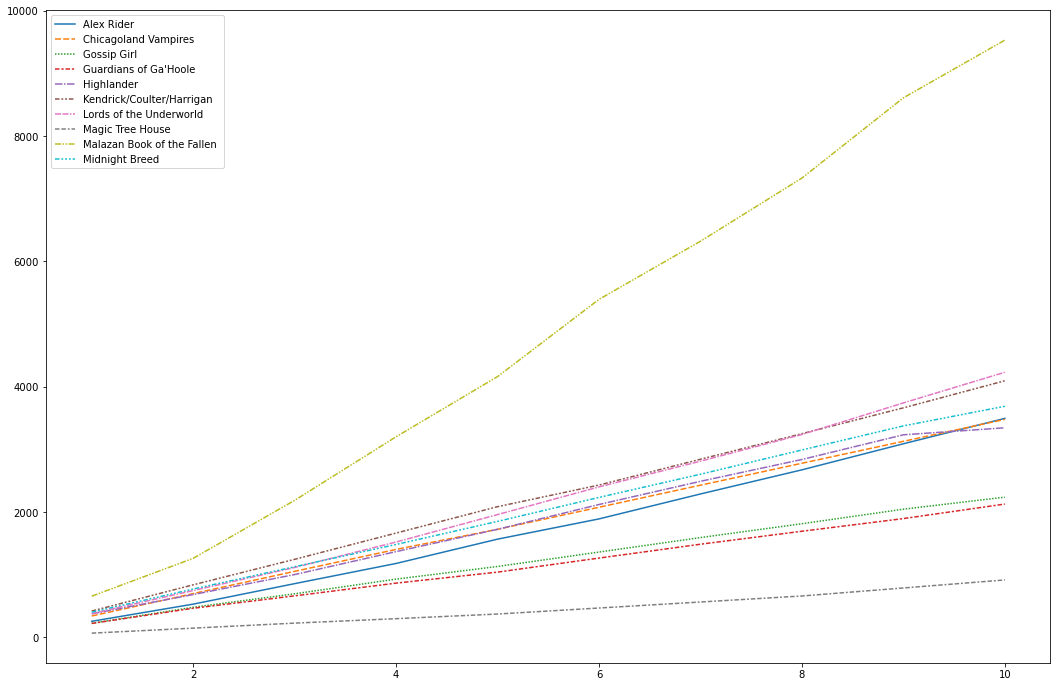

In [3]:
dataset_filtered,_,_,_ = read_data()
Data,ComulativeData = visualize(dataset_filtered)

In [4]:
ComulativeData
### Given below is the Data with Key as Series name and in Values we have 2 List pages count commulative
## Values and book series number
# For the Sake of simplicity we have changes the all the books indexes from there original to 1-10 range.

{'Alex Rider ': [[256.0,
   530.0,
   857.0,
   1179.0,
   1567.0,
   1890.0,
   2288.0,
   2673.0,
   3089.0,
   3494.0],
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]],
 'Chicagoland Vampires ': [[341.0,
   698.0,
   1053.0,
   1403.0,
   1724.0,
   2076.0,
   2428.0,
   2778.0,
   3128.0,
   3478.0],
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]],
 'Gossip Girl ': [[224.0,
   480.0,
   695.0,
   929.0,
   1131.0,
   1361.0,
   1592.0,
   1813.0,
   2045.0,
   2237.0],
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]],
 "Guardians of Ga'Hoole ": [[222.0,
   464.0,
   662.0,
   865.0,
   1041.0,
   1265.0,
   1486.0,
   1693.0,
   1895.0,
   2127.0],
  [1, 2, 3, 4, 5, 6, 7, 8, 13, 15]],
 'Highlander ': [[375.0,
   683.0,
   1002.0,
   1368.0,
   1724.0,
   2120.0,
   2490.0,
   2838.0,
   3232.0,
   3344.0],
  [1, 1, 2, 2, 3, 4, 5, 6, 7, 8]],
 'Kendrick/Coulter/Harrigan ': [[420.0,
   838.0,
   1245.0,
   1664.0,
   2085.0,
   2430.0,
   2842.0,
   3250.0,
   3662.0,
   4094.0],
  [1, 2, 4, 5, 6, 7, 8, 9, 10, 11]],
 'Lords

In [5]:
Data

,1,2,3,4,5,6,7,8,9,10
Alex Rider,256.0,530.0,857.0,1179.0,1567.0,1890.0,2288.0,2673.0,3089.0,3494.0
Chicagoland Vampires,341.0,698.0,1053.0,1403.0,1724.0,2076.0,2428.0,2778.0,3128.0,3478.0
Gossip Girl,224.0,480.0,695.0,929.0,1131.0,1361.0,1592.0,1813.0,2045.0,2237.0
Guardians of Ga'Hoole,222.0,464.0,662.0,865.0,1041.0,1265.0,1486.0,1693.0,1895.0,2127.0
Highlander,375.0,683.0,1002.0,1368.0,1724.0,2120.0,2490.0,2838.0,3232.0,3344.0
Kendrick/Coulter/Harrigan,420.0,838.0,1245.0,1664.0,2085.0,2430.0,2842.0,3250.0,3662.0,4094.0
Lords of the Underworld,379.0,747.0,1115.0,1521.0,1959.0,2401.0,2811.0,3237.0,3741.0,4230.0
Magic Tree House,67.0,147.0,227.0,298.0,372.0,468.0,564.0,660.0,788.0,916.0
Malazan Book of the Fallen,657.0,1261.0,2186.0,3201.0,4161.0,5393.0,6321.0,7329.0,8609.0,9530.0
Midnight Breed,402.0,771.0,1127.0,1482.0,1850.0,2233.0,2603.0,2990.0,3374.0,3687.0


### <br><br> Question 5 
##### Algorithmic Question

<br>You are given a string written in english capital letters, for example **S="CADFECEILGJHABNOPSTIRYOEABILCNR."** You are asked to find the maximum length of a subsequence of characters that is in alfabetical order. For example, here a subsequence of characters in alphabetical order is the **"ACEGJSTY": "CADFECEILGJHABNOFPSTIRYOEABILCNR."** Among all the possible such sequences, you are asked to find the one that is the longest.<br>
<br>
Define as ***X[i] = "the length of the longest sequence of characters in alphabetical order that terminates at the i-th character".*** One can prove that
<br><br>
**X[i] = 1 + max{X[j]; j = 0, ..., i-1, such that S[j]<S[i]}<br>**
<br>
**X[i] = 1, if there does not exist such a j.<br>**
<br>
Write a recursive program that, given a string, computes the length of the subsequence of maximum length that is in alphabetical order. Try some examples. Are the examples of short strings correct? Can you find examples that your algorithm does not terminate in reasonable time?<br><br>
Show that the running time of the algorithm is exponential.<br><br>
Write a program that computes the length of the subsequence of maximum length, using dynamic programming.<br>
What is its runtime complexity?<br>

#### Recursive program

In [98]:
def max_sub_length (S, i, L):    # we apply the recursive equations to each i 

    if i < len(S)-1:
        L.append(recursive(S, i+1))   # L is the list that will collect the X[i]
        return max_sub_length(S, i+1,L)  
    
    else:
        return max(L)


def recursive (S, i):      # recursive equations 
    return 1 + max([recursive(S, j) for j in range(0, i) if S[j] < S[i]], default = 0)

In [99]:
max_sub_length('CADFECEILGJHABNOFPSTIRYOEABILCNR',-1,[])

11

In [100]:
max_sub_length('ABDFGEC',-1,[])

5

The string below has 96 characters and it takes more than two minutes to run. 

In [101]:
max_sub_length('CADFECEILGJHABNOFPSTIRYOEABILCNRCADFECEILGJHABNOFPSTIRYOEABILCNRCADFECEILGJHABNOFPSTIRYOEABILCNR',-1,[])

15

Let's calculate the time complexity of the code.

We will first calculate the time comlexity for the `recursive` function. In the worst case, for each $i$ we call the function for all $j = 0, 1, \dots, i-1$, so we will get: 
$$
T(n) = \sum_{j=0}^{n-1} \, T(j) = T(1)+T(2)+...+T(n-2)+T(n-1)
$$

Let's now observe the `max_sub_length` function and find its time complexity. This function does some constant operations and then moves to the next $i$ until it reaches the total length of the string $s$ (we will set `len(s) = n`). In formulas: 

$$
T(n+1) = O(1) + T(n) 
$$

Combining the two formulas we found, we have that: 
$$
T(n+1) = O(1) + \sum_{j=0}^{n-1} \, T(j)
$$

Now we want to prove that $T(n) = \Theta(2^n)$.

We first prove that $T(n) = \Omega(2^n)$.

We rewrite the first formula as:

$$
T(n)= T(n-1)+T(n-2)+...+T(1) \ge T(n-1)+T(n-2) \ge T(n-2)+T(n-2)+const
=2T(n-2)+const
$$

Leaving out the constant operations (if, comparison, assignment...) and applying the first inequality to n-1 we obtain:

$$
2T(n-2) \ge 2(2T(n-4)) \ge 2(4T(n-6)) \ge .... \ge 2^i(T(n-2i)) 
$$

It ends when $T(n-2i)$ becomes a constant, which happens when ${i} = {n \over 2}$

$$
2^i(T(n-2i)) \ge 2^{n \over 2}T(0) = O(2^{n \over 2})
$$

We are left to prove that $T(n) = O(2^n)$.


In other words, we need to prove that:

$$
T(n+1) \leq c2^{n+1} \quad \text{where} \, c \, \text{is a real positive constant}
$$


We apply the induction principle, so (fix that $d := T(1)$):  

$(i)$ $T(1) \leq c2 \iff d \leq 2c$

$(ii)$ 

$$
T(n+1) = d + \sum_{j=0}^{n-1} T(j) \leq d + c\sum_{j=0}^{n-1} 2^j = d + c2^n - 1 \leq 2c + c2^n \leq c2^{n+1} 
$$


Therefore: $T(n+1) = O(2^{n+1})$

#### Dynamic programming

In [27]:
def seq_max_subsequence(string):
    #as suggests by the formula X[i] = 1 + max{X[j]; j = 0, ..., i-1, such that S[j]<S[i]}
    # we initialize a sequence which represent the length of the longest sequence 
    #of characters in alphabetical order that includes the i-th character
    
    seq=[1]*len(string)
    
    #we calculate for every character (c) of the string the how many 
    #ordered characters there are before
    
    for s in range(1,len(string)):
        temp_str=''
        for k in range(0,s):
            if string[s]>string[k] and seq[s]<=seq[k]:
                seq[s]=seq[k]+1
    return seq

In [28]:
s=seq_max_subsequence('CADFECEILGJHABNOFPSTIRYOEABILCNR')

In [31]:
print(s)

[1, 1, 2, 3, 3, 2, 3, 4, 5, 4, 5, 5, 1, 2, 6, 7, 4, 8, 9, 10, 6, 9, 11, 7, 3, 1, 2, 6, 7, 3, 8, 9]


In [30]:
max(s)

11

$s$ represents dinamically the sequence of the longest subsequence ending with the i-th value. We can find the length of the longest subsequence by looking for the max value.

This dynamic program updates the performance of the recursive function, because the latter computes the same subtask several times. In this case we can memorize them in a list, so we have all the previous results and we don't need to repeat all of the computations.
> $T(n)$ : running time with n elements

At the beginning we run the algorithm only for the first character, then for two, for three and so on.

>1+2+3+....+n-3+n-2+n-1+n=$\sum_{i=0}^n (n-i)$ = $\sum_{i=1}^n i $=$ {n(n+1)}\over{2}$\
\
So $T(n)$=$\mathcal{O}(n^2)$


### Bonus question

Let $X[i]$ be the length of the longest sequence of characters in alphabetical order that terminates at the i-th character, and we want to prove that: 

$$
X[i] = 1 + max\{ \, X[j]; \, \text{for} \, j = 0,1, \dots i-1 \, \text{if} \, S[j] < S[i] \, \} \\
X[i] = 1 \quad \text{if such a j doesn't exist}
$$

Suppose that there is another sequence $Y[n]$ such that $Y[n] > X[n]$. Now let $k < n$ (if such a number didn't exist the proof would be trivial) be a number such that we can write: $Y[n] = 1 + X[k]$ , in the same way there is a number $p$ such that we can write: $X[n] = 1 + X[p]$. From the definition of $X[n]$ we know that $X[p] > X[k]$ since it's the maximum length sequence, but we have supposed that $Y[n] > X[n]$, which leads us to a contradiction.